In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 定义目标函数
def target_function(x):
    return x + 5 * np.sin(5 * x)

In [3]:
# 数据生成
np.random.seed(0)

# 训练集：在[−2,2]范围内随机生成1000个数据点
x_train = np.random.uniform(-2, 2, (1000, 1))
y_train = target_function(x_train) + np.random.normal(0, 0.3, (1000, 1))  # 降低噪声

# 在[−2,2]之间生成200个等间距的点，不带噪声
x_test = np.linspace(-2, 2, 200).reshape(-1, 1)
y_test = target_function(x_test)

In [4]:
# 模型参数初始化
input_size = 1 #输入层
hidden_size = 128 #隐藏层
output_size = 1 #输出层

# 初始化权重和偏置
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, hidden_size))
W3 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b3 = np.zeros((1, output_size))

In [5]:
# 训练过程
learning_rate = 0.01 #学习率 
num_epochs = 7000 # 7000轮次
loss_history = [] # 存储损失值

for epoch in range(num_epochs):
    # 前向传播
    hidden1_pre = np.dot(x_train, W1) + b1 #隐藏层 1 的加权和
    hidden1 = np.maximum(0, hidden1_pre)  # ReLU
    hidden2_pre = np.dot(hidden1, W2) + b2 #隐藏层 2 的加权和
    hidden2 = np.maximum(0, hidden2_pre)  # ReLU
    y_pred = np.dot(hidden2, W3) + b3 #预测值

    # 计算损失
    loss = np.mean((y_pred - y_train) ** 2) #MSE
    loss_history.append(loss)

    # 反向传播
    dL_dy_pred = 2 * (y_pred - y_train) / y_train.shape[0]

    # 链式求导计算梯度
    # 输出层梯度
    dW3 = np.dot(hidden2.T, dL_dy_pred)
    db3 = np.sum(dL_dy_pred, axis=0, keepdims=True)
    # 反向传播到隐藏层 2 
    dL_dhidden2 = np.dot(dL_dy_pred, W3.T)
    dhidden2_pre = dL_dhidden2 * (hidden2_pre > 0)
    # 隐藏层 2 梯度
    dW2 = np.dot(hidden1.T, dhidden2_pre)
    db2 = np.sum(dhidden2_pre, axis=0, keepdims=True)
    # 反向传播到隐藏层 1 
    dL_dhidden1 = np.dot(dhidden2_pre, W2.T)
    dhidden1_pre = dL_dhidden1 * (hidden1_pre > 0)
    # 隐藏层 1 梯度 
    dW1 = np.dot(x_train.T, dhidden1_pre)
    db1 = np.sum(dhidden1_pre, axis=0, keepdims=True)

    # 梯度下降法更新参数
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3

    # 每 500 轮输出一次损失
    if (epoch + 1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}")


Epoch [500/7000], Loss: 11.6169
Epoch [1000/7000], Loss: 7.7328
Epoch [1500/7000], Loss: 4.0532
Epoch [2000/7000], Loss: 3.4452
Epoch [2500/7000], Loss: 2.6921
Epoch [3000/7000], Loss: 1.7588
Epoch [3500/7000], Loss: 1.0258
Epoch [4000/7000], Loss: 0.6094
Epoch [4500/7000], Loss: 0.3821
Epoch [5000/7000], Loss: 0.2741
Epoch [5500/7000], Loss: 0.2060
Epoch [6000/7000], Loss: 0.1351
Epoch [6500/7000], Loss: 0.1127
Epoch [7000/7000], Loss: 0.1094


In [6]:
# 测试集预测
hidden1_pre_test = np.dot(x_test, W1) + b1 # 隐藏层 1
hidden1_test = np.maximum(0, hidden1_pre_test)
hidden2_pre_test = np.dot(hidden1_test, W2) + b2 # 隐藏层 2
hidden2_test = np.maximum(0, hidden2_pre_test)
y_pred_test = np.dot(hidden2_test, W3) + b3 #预测值

# 计算测试集MSE，衡量拟合程度
test_mse = np.mean((y_pred_test - y_test) ** 2)
print(f"Test MSE: {test_mse:.4f}")

Test MSE: 0.0451


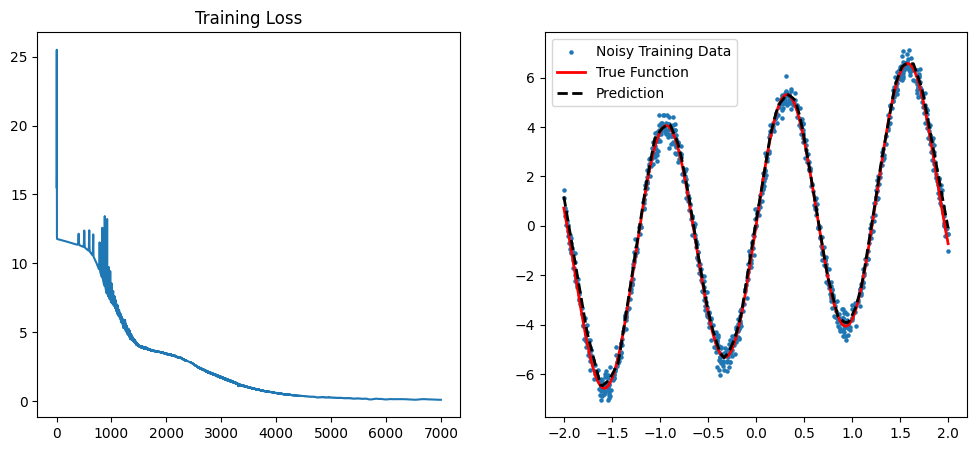

In [7]:
# 可视化结果
# 1.训练损失随迭代下降的曲线
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss")
# 2.蓝色点：训练数据 红色曲线：目标函数 黑色虚线：预测结果
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, s=5, label="Noisy Training Data")
plt.plot(x_test, y_test, "r", linewidth=2, label="True Function")
plt.plot(x_test, y_pred_test, "k--", linewidth=2, label="Prediction")
plt.legend()
plt.show()